In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13494875837ab1f9001846ae1f477066


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | swellendam
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | samana
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | mantua
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | boa vista
Processing Record 11 of Set 1 | kungurtug
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | shelbyville
Processing Record 15 of Set 1 | cuamba
Processing Record 16 of Set 1 | meaux
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | oranjestad
Processing Record 21 of Set 1 | hualmay
Processing Record 22 of Set 1 | ponta 

Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | sao jose do egito
Processing Record 44 of Set 4 | alyangula
Processing Record 45 of Set 4 | jawhar
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | lovozero
Processing Record 50 of Set 4 | lethem
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | chepen
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ketchikan
Processing Record 5 of Set 5 | los llanos de aridane
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | toyos
Processing Record 8 of Set 5 | ous
Processing Record 9 of Set 5 | nizwa
Processing Record 10 of Set 5 | tazovskiy
Processing Record 11 of Set 5 | sembabule
Processing Record 12 of Set 5 | kathor
Processing Record 13 of Set 5 | copiapo
Processing Record 14 of Set 5 | marawi
Processing Reco

Processing Record 32 of Set 8 | tura
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | natal
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | zabaykalsk
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | toliary
City not found. Skipping...
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | linda
Processing Record 41 of Set 8 | koungou
Processing Record 42 of Set 8 | tianmen
Processing Record 43 of Set 8 | cabo san lucas
Processing Record 44 of Set 8 | roma
Processing Record 45 of Set 8 | nador
Processing Record 46 of Set 8 | shingu
Processing Record 47 of Set 8 | mbandaka
Processing Record 48 of Set 8 | sao joaquim
Processing Record 49 of Set 8 | tacuarembo
Processing Record 50 of Set 8 | maniitsoq
Processing Record 1 of Set 9 | lolua
City not found. Skipping...
Processing Record 2 of Set 9 | dongsheng
Processing Record 3 of Set 9 | nelson bay
Processing Record 4 of

Processing Record 20 of Set 12 | tshikapa
Processing Record 21 of Set 12 | gafanha da encarnacao
Processing Record 22 of Set 12 | humboldt
Processing Record 23 of Set 12 | atar
Processing Record 24 of Set 12 | balabac
Processing Record 25 of Set 12 | sarakhs
Processing Record 26 of Set 12 | ancud
Processing Record 27 of Set 12 | mentok
City not found. Skipping...
Processing Record 28 of Set 12 | port lincoln
Processing Record 29 of Set 12 | ohara
Processing Record 30 of Set 12 | fergus falls
Processing Record 31 of Set 12 | kaili
Processing Record 32 of Set 12 | deqing
Processing Record 33 of Set 12 | falefa
Processing Record 34 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 35 of Set 12 | shrigonda
Processing Record 36 of Set 12 | vanimo
Processing Record 37 of Set 12 | pemangkat
Processing Record 38 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 39 of Set 12 | gayeri
Processing Record 40 of Set 12 | umm lajj
Processing Record 41 of Set 12 | 

In [7]:
len(city_data)

581

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,78.80,65,40,11.50,US,2021-04-01 21:17:50
1,Swellendam,-34.0226,20.4417,62.60,72,99,5.75,ZA,2021-04-01 21:21:29
2,Kaitangata,-46.2817,169.8464,55.99,70,100,15.01,NZ,2021-04-01 21:21:30
3,Samana,19.2056,-69.3369,82.40,78,20,11.50,DO,2021-04-01 21:21:30
4,Butaritari,3.0707,172.7902,82.38,77,51,13.76,KI,2021-04-01 21:21:30
5,Mantua,45.1667,10.7833,61.00,67,0,3.44,IT,2021-04-01 21:21:31
6,Upernavik,72.7868,-56.1549,27.93,72,100,7.58,GL,2021-04-01 21:21:31
7,Boa Vista,2.8197,-60.6733,91.40,38,20,10.36,BR,2021-04-01 21:21:31
8,Kungurtug,50.5994,97.5228,8.78,93,5,1.97,RU,2021-04-01 21:21:32
9,Berlevag,70.8578,29.0864,30.18,91,100,3.22,NO,2021-04-01 21:21:32


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-04-01 21:17:50,19.7297,-155.0900,78.80,65,40,11.50
1,Swellendam,ZA,2021-04-01 21:21:29,-34.0226,20.4417,62.60,72,99,5.75
2,Kaitangata,NZ,2021-04-01 21:21:30,-46.2817,169.8464,55.99,70,100,15.01
3,Samana,DO,2021-04-01 21:21:30,19.2056,-69.3369,82.40,78,20,11.50
4,Butaritari,KI,2021-04-01 21:21:30,3.0707,172.7902,82.38,77,51,13.76
5,Mantua,IT,2021-04-01 21:21:31,45.1667,10.7833,61.00,67,0,3.44
6,Upernavik,GL,2021-04-01 21:21:31,72.7868,-56.1549,27.93,72,100,7.58
7,Boa Vista,BR,2021-04-01 21:21:31,2.8197,-60.6733,91.40,38,20,10.36
8,Kungurtug,RU,2021-04-01 21:21:32,50.5994,97.5228,8.78,93,5,1.97
9,Berlevag,NO,2021-04-01 21:21:32,70.8578,29.0864,30.18,91,100,3.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

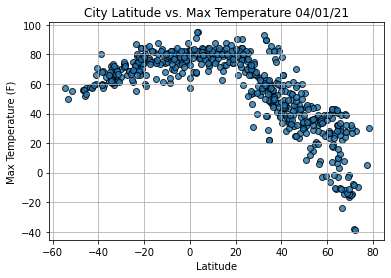

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

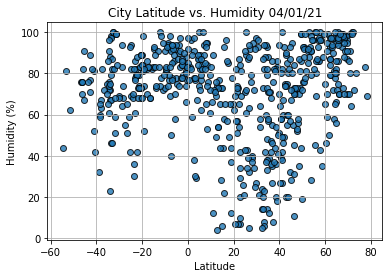

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

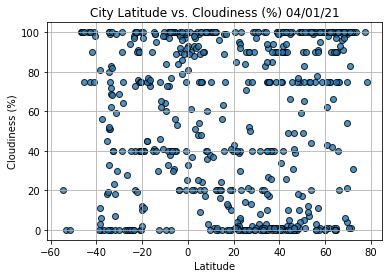

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

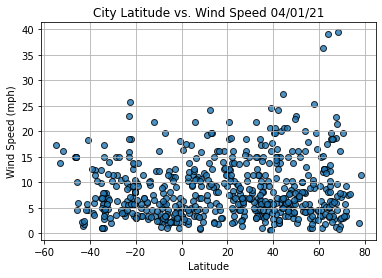

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()